In [21]:
from tkinter import Tk
from tkinter.filedialog import askdirectory

# Hide the main Tkinter window
Tk().withdraw()
# Print the selected folder
print(f"Please select the folder from the pop up:")
# Ask the user to select the folder with custom text
home_folder = askdirectory(title="Select the Project_submission folder")

# Check if a folder was selected
if not home_folder:
    print("No folder selected. Exiting.")
    exit()

# Print the selected folder or use it in your script
print(f"Selected folder: {home_folder}")


Please select the folder from the pop up:
Selected folder: D:/Others/Project_Submission_ALL_DATA


In [53]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import math

def get_all_tags_from_events(event_files):
    """Collect all unique summary tags from a list of TensorBoard event files."""
    tags = set()
    for event_file in event_files:
        try:
            for event in tf.compat.v1.train.summary_iterator(event_file):
                for value in event.summary.value:
                    tags.add(value.tag)
        except Exception as e:
            print(f" Error reading {event_file}: {e}")
    return tags

def load_accuracy_from_events(event_files, tag_candidates):
    """Try to load accuracy values using multiple possible tag names."""
    accuracy = []
    for event_file in event_files:
        try:
            for event in tf.compat.v1.train.summary_iterator(event_file):
                for value in event.summary.value:
                    if value.tag in tag_candidates:
                        tensor_value = tf.make_ndarray(value.tensor)
                        accuracy.append((event.step, tensor_value))
        except Exception as e:
            print(f" Could not read {event_file}: {e}")
    return accuracy

def load_accuracy_from_folder(folder):
    """Find all TensorBoard event files in a folder and try multiple tag names."""
    accuracy_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.startswith("events.out.tfevents"):
                accuracy_files.append(os.path.join(root, file))

    if not accuracy_files:
        print(f" No event files found in {folder}")
        return []

    tags_found = get_all_tags_from_events(accuracy_files)
    print(f" Tags found in {folder}: {tags_found}")

    tag_candidates = {'accuracy', 'epoch_accuracy', 'val_accuracy', 'epoch_val_accuracy', 'categorical_accuracy'}
    relevant_tags = list(tag_candidates & tags_found)
    if not relevant_tags:
        print(f" No matching accuracy tags found in {folder}")
        return []

    print(f" Using tag(s): {relevant_tags}")
    return load_accuracy_from_events(accuracy_files, relevant_tags)


def plot_accuracy(train_dirs, val_dirs, model_titles=None):
    """Plot accuracy curves for any number of model directories."""
    model_titles = model_titles or []
    num_models = len(train_dirs)

    if num_models == 0:
        print(" No models provided.")
        return

    # Determine subplot layout dynamically
    cols = min(4, num_models)  # up to 4 per row
    rows = math.ceil(num_models / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['savefig.format'] = 'eps'
    plt.rcParams['savefig.dpi'] = 400
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'

    # Handle case where axes is not a 2D array (e.g., only one model)
    if num_models == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes.flatten()
    else:
        axes = axes.flat

    for i, (train_dir, val_dir) in enumerate(zip(train_dirs, val_dirs)):
        ax = axes[i]

        train_accuracy = load_accuracy_from_folder(train_dir)
        val_accuracy = load_accuracy_from_folder(val_dir)

        if not train_accuracy or not val_accuracy:
            ax.set_title(f"{model_titles[i] if model_titles else f'Model {i+1}'} (no data)")
            ax.axis('off')
            continue

        train_steps, train_accuracies = zip(*train_accuracy)
        val_steps, val_accuracies = zip(*val_accuracy)

        ax.plot(train_steps, train_accuracies, label='Train Accuracy', linestyle='-', color='blue')
        ax.plot(val_steps, val_accuracies, label='Validation Accuracy', linestyle='-', color='orange')
        ax.set_title(model_titles[i] if model_titles else f'Model {i+1}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Accuracy')
        ax.legend()
        ax.grid(True)

    # Hide unused axes if any
    for j in range(num_models, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    #plt.savefig('accuracy_plots_dynamic.png', format='png', dpi=400)
    plt.show()


### Accuracy Curves for 4-Class Classification ###

 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model4/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model4/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s): ['e

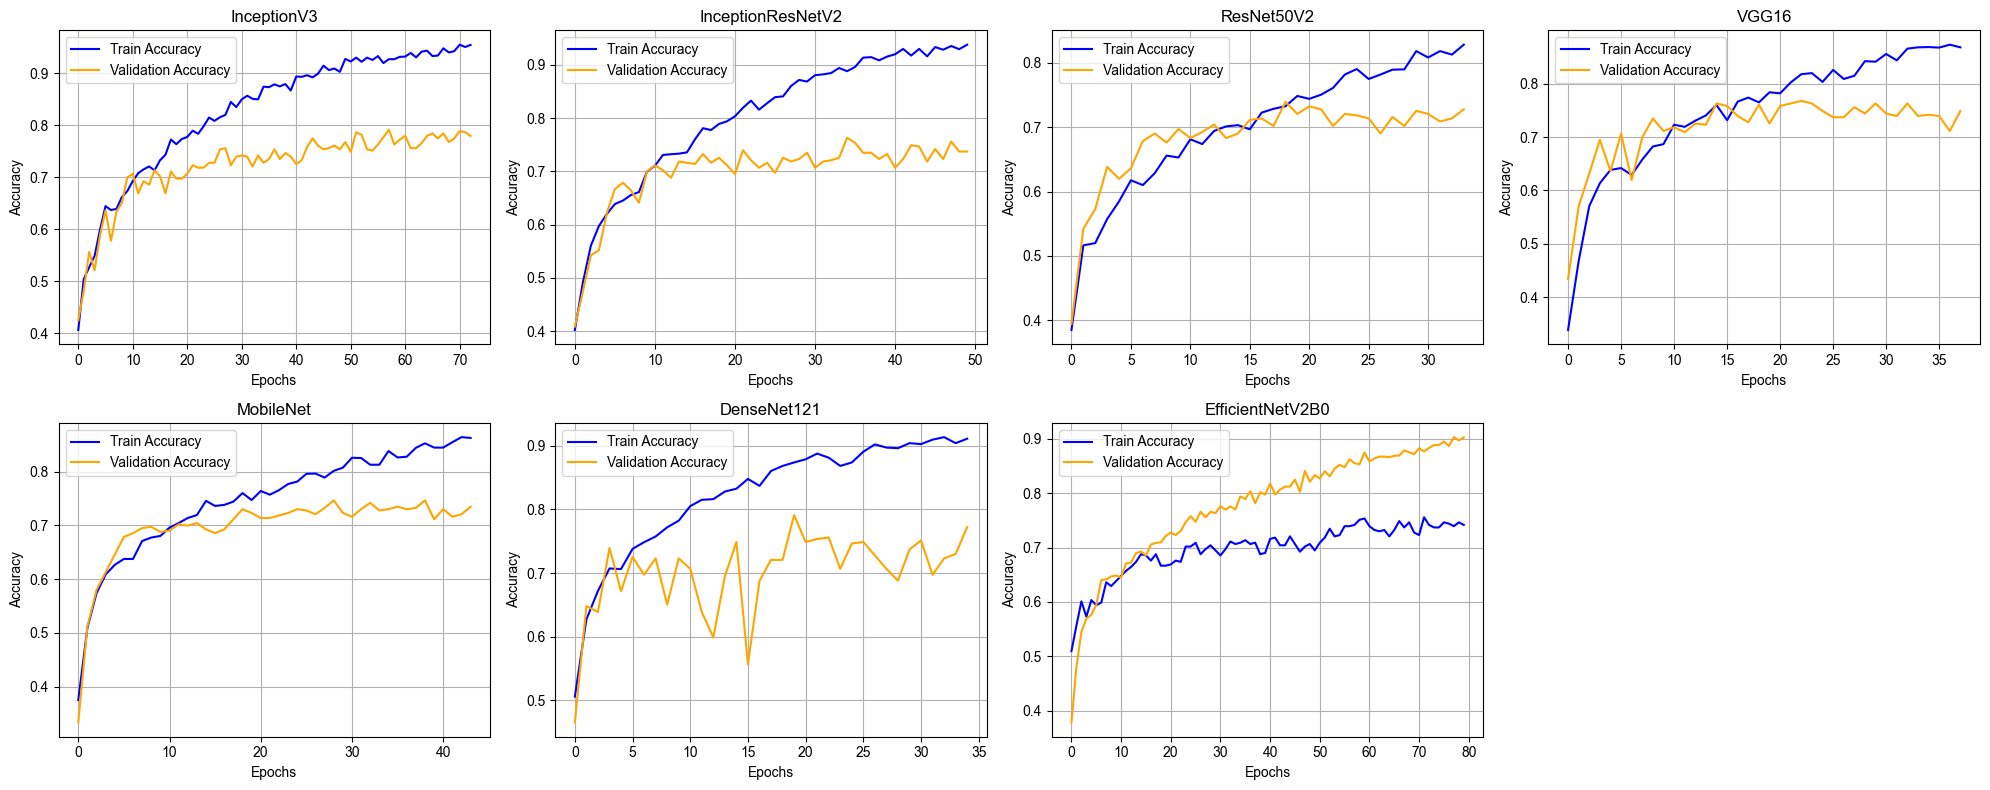

In [54]:
train_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model4/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model5/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model6/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model7/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model8/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model_eff/train")]
    # Add paths for other models here


val_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model4/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model5/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model6/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model7/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model8/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model_eff/validation")
    ]


model_titles = [
    "InceptionV3",
    "InceptionResNetV2",
    "ResNet50V2",
    "VGG16",
    "MobileNet",
    "DenseNet121",
    "EfficientNetV2B0",

]

plot_accuracy(train_dirs, val_dirs, model_titles)

 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s): ['epoch_accuracy']


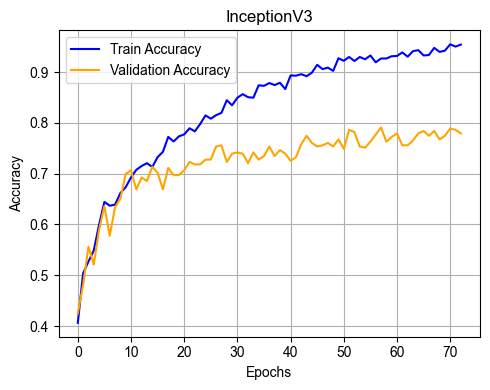

In [55]:
train_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/train")
    
    # Add paths for other models here
]

val_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/validation")
    # Add paths for other models here
]


model_titles = [
    "InceptionV3"
]

plot_accuracy(train_dirs, val_dirs, model_titles)

📊 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
✅ Using tag(s): ['epoch_accuracy']
📊 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
✅ Using tag(s): ['epoch_accuracy']


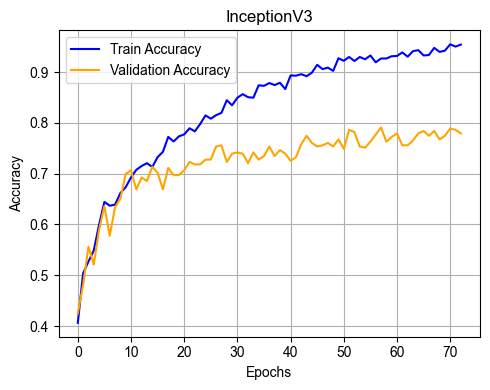

In [40]:
train_dirs = [
 os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/train")    
    # Add paths for other models here
]

val_dirs = [
 os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_4_Classes/LogsDirectory/Model3/validation")    # Add paths for other models here
]


model_titles = [
    "InceptionV3"
]

plot_accuracy(train_dirs, val_dirs, model_titles)

📊 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
✅ Using tag(s): ['epoch_accuracy']
📊 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
✅ Using tag(s): ['epoch_accuracy']


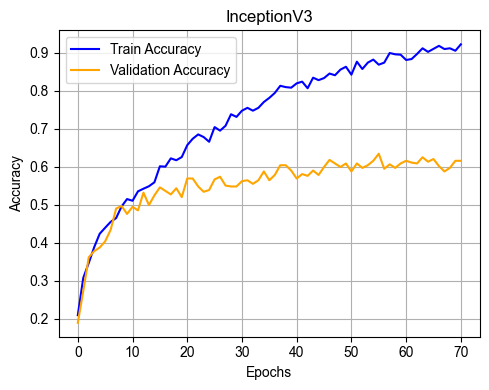

In [42]:
train_dirs = [
 os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/train")    
    # Add paths for other models here
]

val_dirs = [
 os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/validation")    # Add paths for other models here
]


model_titles = [
    "InceptionV3"
]

plot_accuracy(train_dirs, val_dirs, model_titles)

📊 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model7/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
✅ Using tag(s): ['epoch_accuracy']
📊 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model7/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
✅ Using tag(s): ['epoch_accuracy']


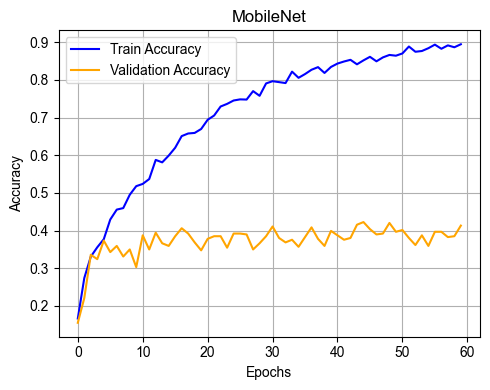

In [44]:
train_dirs = [
 os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model7/train")    
    # Add paths for other models here
]

val_dirs = [
 os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model7/validation")    # Add paths for other models here
]


model_titles = [
    "MobileNet"
]

plot_accuracy(train_dirs, val_dirs, model_titles)

### Accuracy Curves for 7-Class Classification ###

 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model4/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model4/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s): ['e

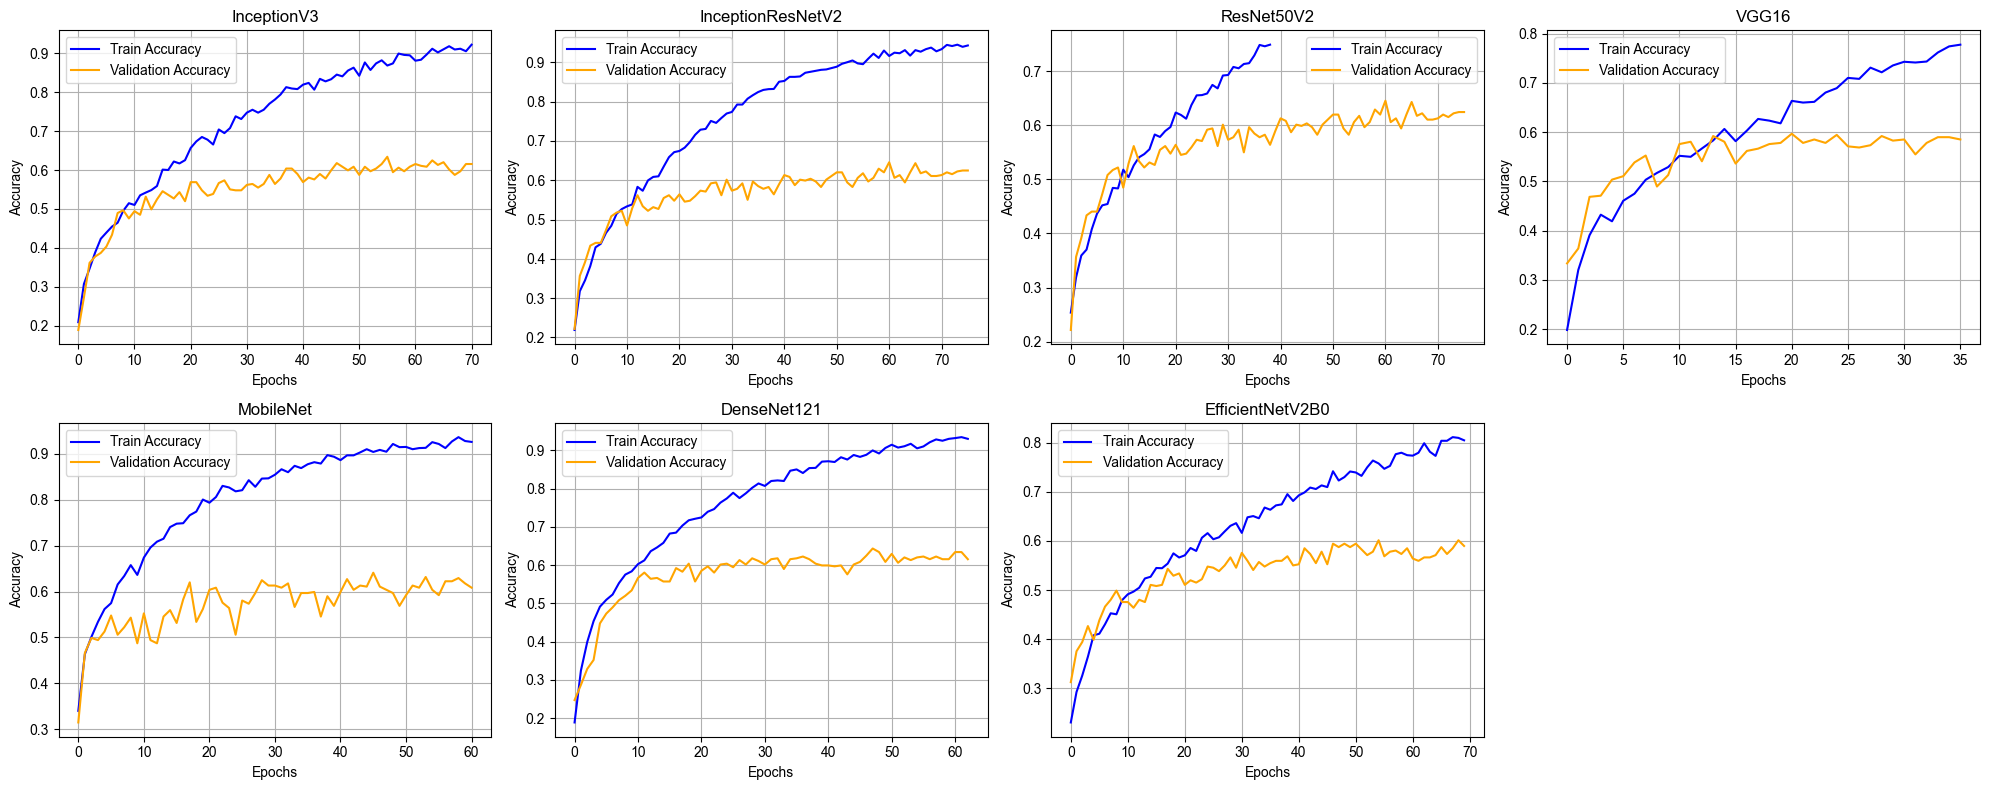

In [56]:
train_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model4/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model5/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model6/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model7/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model8/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model_eff/train")]
    # Add paths for other models here


val_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model3/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model4/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model4/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model6/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model7/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model8/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_7_Classes/LogsDirectory/Model_eff/validation")]


model_titles = [
    "InceptionV3",
    "InceptionResNetV2",
    "ResNet50V2",
    "VGG16",
    "MobileNet",
    "DenseNet121",
    "EfficientNetV2B0",

]

plot_accuracy(train_dirs, val_dirs, model_titles)

### Accuracy Curves for 15-Class Classification ###

 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model3/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model3/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model4/train: {'epoch_loss', 'epoch_accuracy', 'keras'}
 Using tag(s): ['epoch_accuracy']
 Tags found in D:/Others/Project_Submission_ALL_DATA\RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model4/validation: {'evaluation_loss_vs_iterations', 'epoch_loss', 'evaluation_accuracy_vs_iterations', 'epoch_accuracy'}
 Using tag(s):

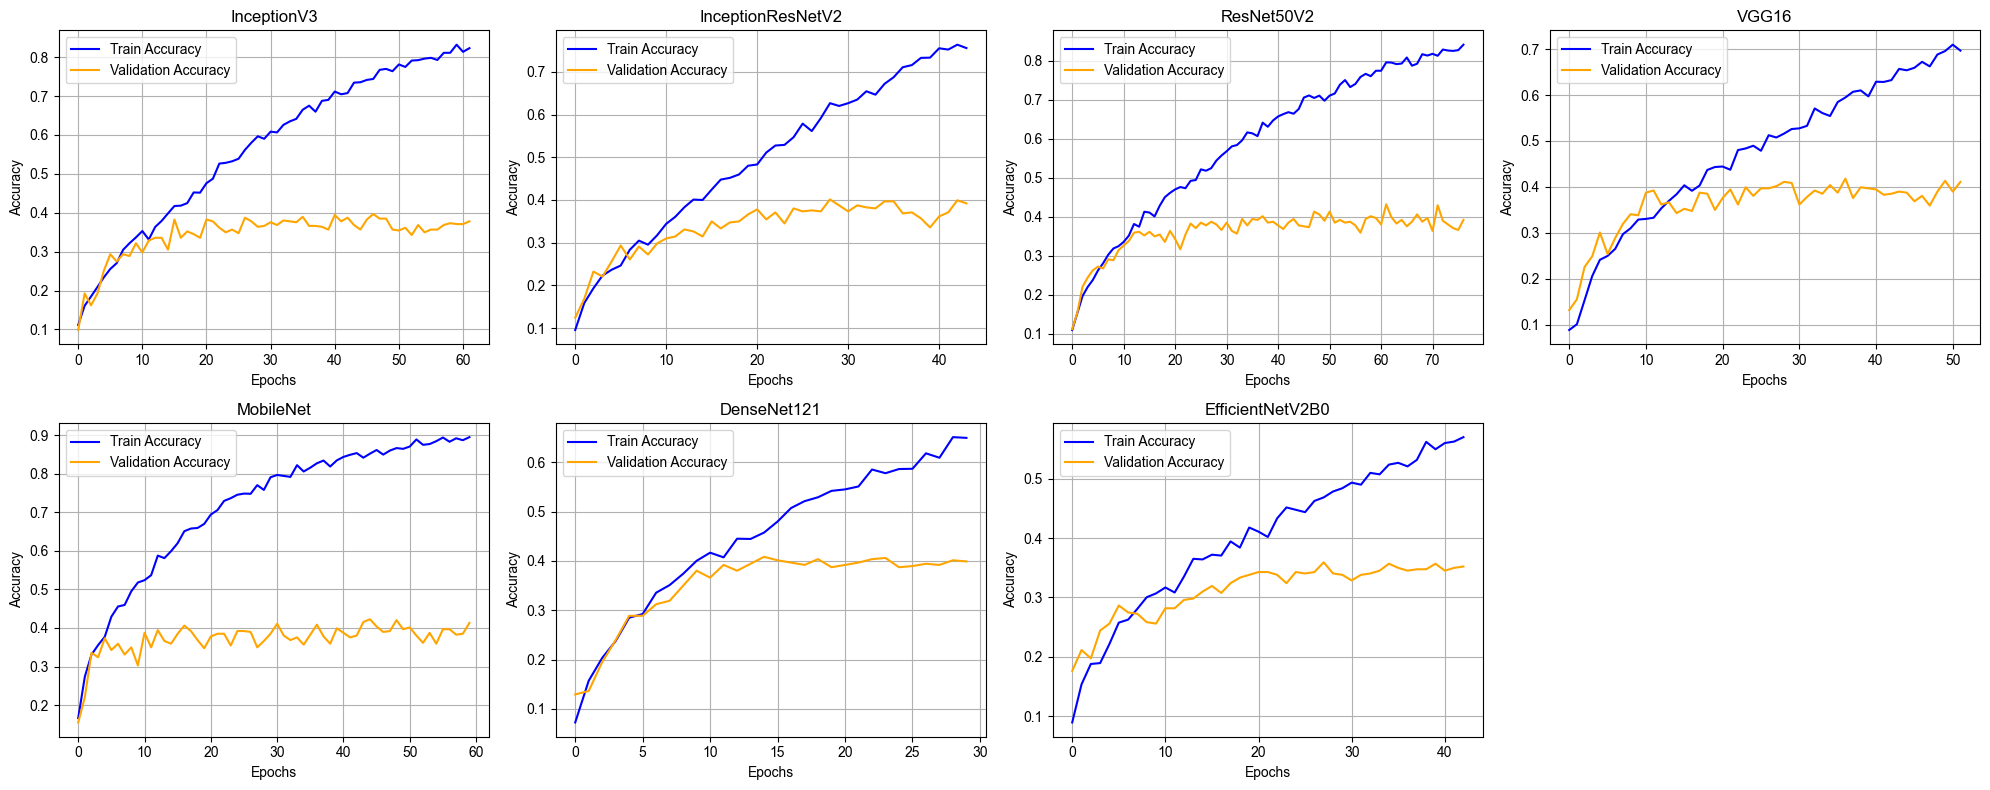

In [57]:
train_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model3/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model4/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model5/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model6/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model7/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model8/train"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model_eff/train")]
    # Add paths for other models here


val_dirs = [
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model3/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model4/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model5/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model6/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model7/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model8/validation"),
    os.path.join(home_folder,"RESULTS/ACCURACY_CURVES_DATA/Accuracy_Curves_Plotting_15_Classes/LogsDirectory/Model_eff/validation")]


model_titles = [
    "InceptionV3",
    "InceptionResNetV2",
    "ResNet50V2",
    "VGG16",
    "MobileNet",
    "DenseNet121",
    "EfficientNetV2B0",

]

plot_accuracy(train_dirs, val_dirs, model_titles)